<a href="https://colab.research.google.com/github/wizfury/tensorflow-practice/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install -U scikit-learn

In [9]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.feature_column as fc
import tensorflow as tf

In [11]:
!pip install kaggle

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download al




  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 54.4MB/s]


In [17]:
mkdir '/content/datasets'

In [19]:
!unzip '/content/titanic.zip' -d '/content/datasets'

Archive:  /content/titanic.zip
  inflating: /content/datasets/gender_submission.csv  
  inflating: /content/datasets/test.csv  
  inflating: /content/datasets/train.csv  


In [40]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval= pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [41]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [42]:
dftrain.shape

(627, 9)

<Axes: >

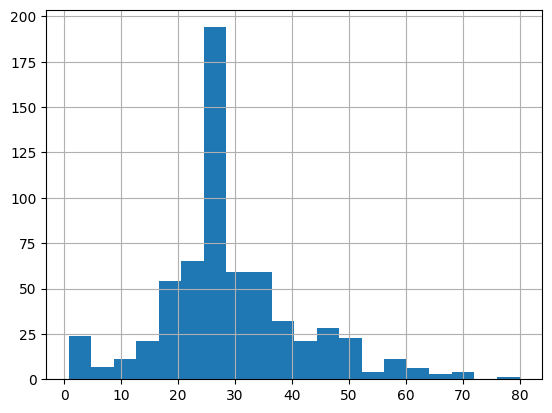

In [50]:
dftrain.age.hist(bins=20)

<Axes: >

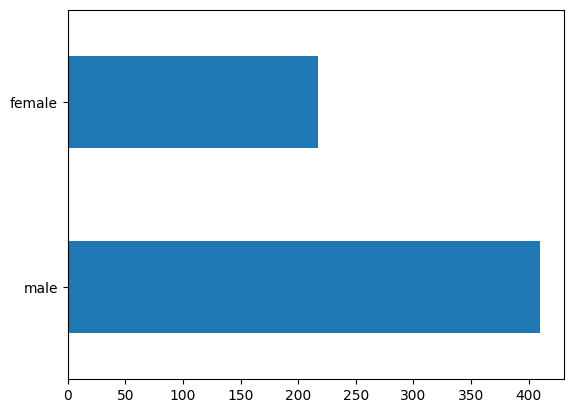

In [53]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

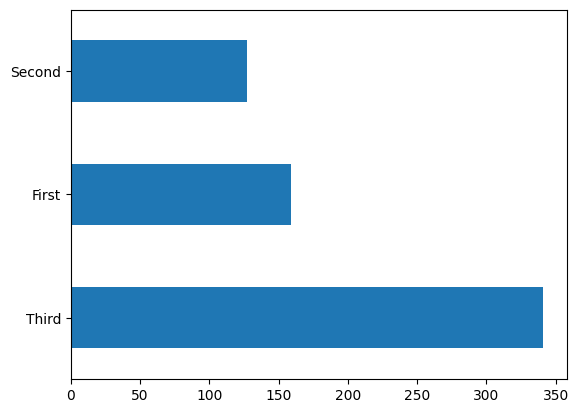

In [54]:
dftrain['class'].value_counts().plot(kind='barh')

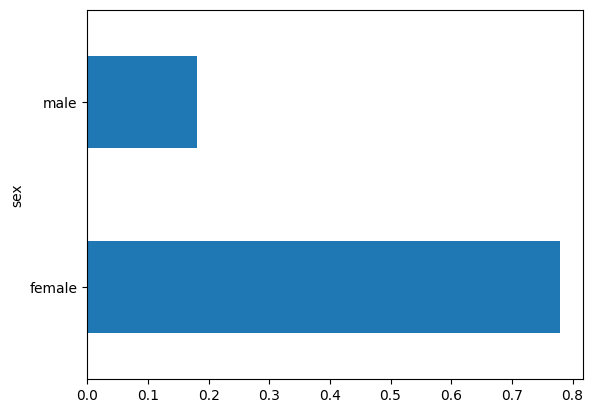

In [65]:
pd.concat([dftrain, y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_label('% survive')

#Training and testing dataset